In [ ]:
!pip install sktime==0.26.1 pmdarima

### Импорты


In [ ]:
import numpy as np
import pandas as pd

from sktime.datasets import load_airline
from sktime.utils.plotting import plot_series
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.forecasting.base import ForecastingHorizon
from sktime.forecasting.arima import AutoARIMA
from sktime.performance_metrics.forecasting import mean_absolute_percentage_error
from sktime.forecasting.naive import NaiveForecaster
from sktime.registry import all_estimators

import warnings
warnings.simplefilter('ignore')

`load_airline` - загружает датасет о ежемесячном количестве пассажиров международных авиарейсов с 1949 по 1960 год

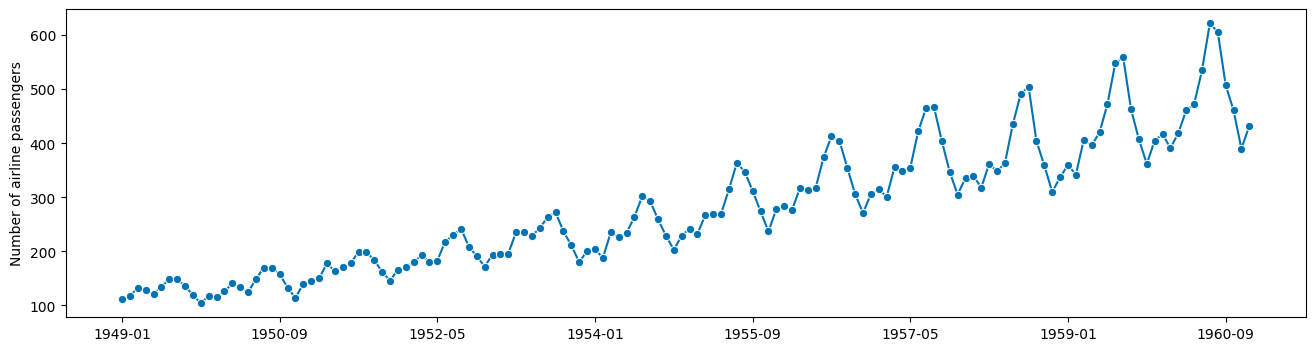

In [ ]:
y = load_airline()
plot_series(y);

In [ ]:
y.head()

,Number of airline passengers
1949-01,112.0
1949-02,118.0
1949-03,132.0
1949-04,129.0
1949-05,121.0


In [ ]:
y.index

PeriodIndex(['1949-01', '1949-02', '1949-03', '1949-04', '1949-05', '1949-06',
             '1949-07', '1949-08', '1949-09', '1949-10',
             ...
             '1960-03', '1960-04', '1960-05', '1960-06', '1960-07', '1960-08',
             '1960-09', '1960-10', '1960-11', '1960-12'],
            dtype='period[M]', length=144)

## Разбиение набора на обучающую и тестовую выборки с учетом времени

In [ ]:
y_train, y_test = temporal_train_test_split(y, test_size=36)

108 36


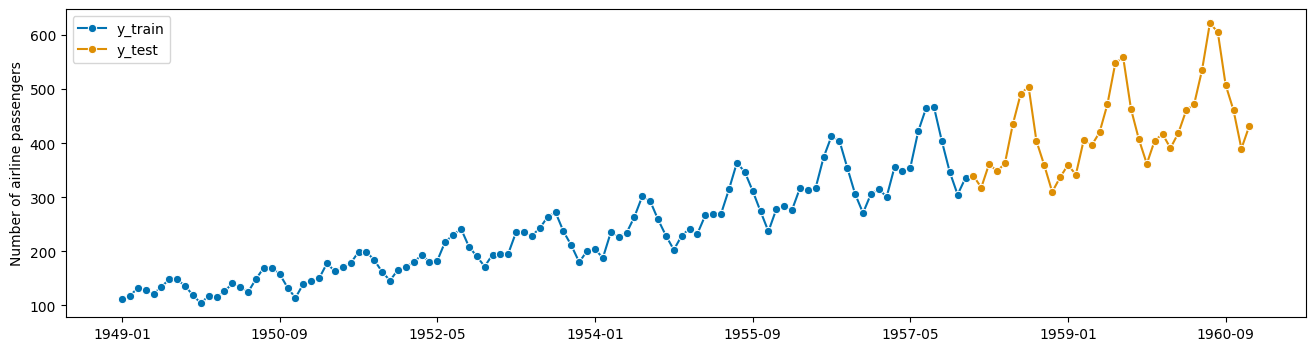

In [ ]:
plot_series(y_train, y_test, labels=['y_train', 'y_test'])
print(y_train.shape[0], y_test.shape[0])

## Построение модели в sktime


### Создание горизонта прогнозирования

In [ ]:
fh = np.arange(1, 37) # абсолютный - 3 года
fh

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36])

В данном случае мы генерируем ежемесячные прогнозы на следующие три года, поскольку исходный период ряда составляет 1 месяц.
В другом примере, чтобы предсказать только второй и пятый месяц в будущем, можно написать:

In [ ]:
fh = np.array([2, 5]) # относительный - 2 и 5 месяц
fh

array([2, 5])

Или

In [ ]:
fh = ForecastingHorizon(y_test.index, is_relative=False)
fh

ForecastingHorizon(['1958-01', '1958-02', '1958-03', '1958-04', '1958-05', '1958-06',
             '1958-07', '1958-08', '1958-09', '1958-10', '1958-11', '1958-12',
             '1959-01', '1959-02', '1959-03', '1959-04', '1959-05', '1959-06',
             '1959-07', '1959-08', '1959-09', '1959-10', '1959-11', '1959-12',
             '1960-01', '1960-02', '1960-03', '1960-04', '1960-05', '1960-06',
             '1960-07', '1960-08', '1960-09', '1960-10', '1960-11', '1960-12'],
            dtype='period[M]', is_relative=False)

### Построение бейзлайна

#### Наивный прогноз

In [ ]:
forecaster = NaiveForecaster(strategy='last')
forecaster.fit(y_train)
y_pred = forecaster.predict(fh)
y_pred.head()

,Number of airline passengers
1958-01,336.0
1958-02,336.0
1958-03,336.0
1958-04,336.0
1958-05,336.0


(<Figure size 1600x400 with 1 Axes>,
 <Axes: ylabel='Number of airline passengers'>)

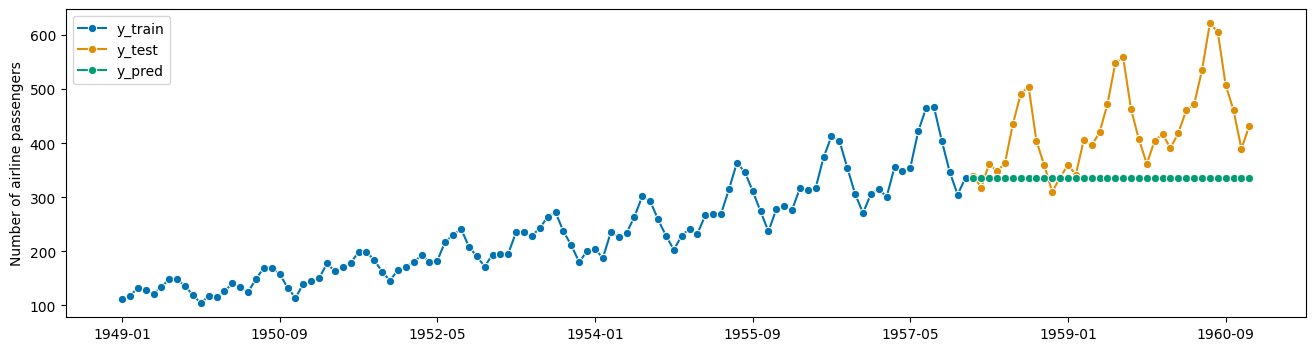

In [ ]:
plot_series(y_train, y_test, y_pred, labels=['y_train', 'y_test', 'y_pred'])

In [ ]:
mean_absolute_percentage_error(y_pred, y_test)

0.2825727513227514

### Наивный сезонный прогноз

In [ ]:
forecaster = NaiveForecaster(strategy='last', sp=12)
forecaster.fit(y_train)
y_pred = forecaster.predict(fh)
y_pred.head()

,Number of airline passengers
1958-01,315.0
1958-02,301.0
1958-03,356.0
1958-04,348.0
1958-05,355.0


(<Figure size 1600x400 with 1 Axes>,
 <Axes: ylabel='Number of airline passengers'>)

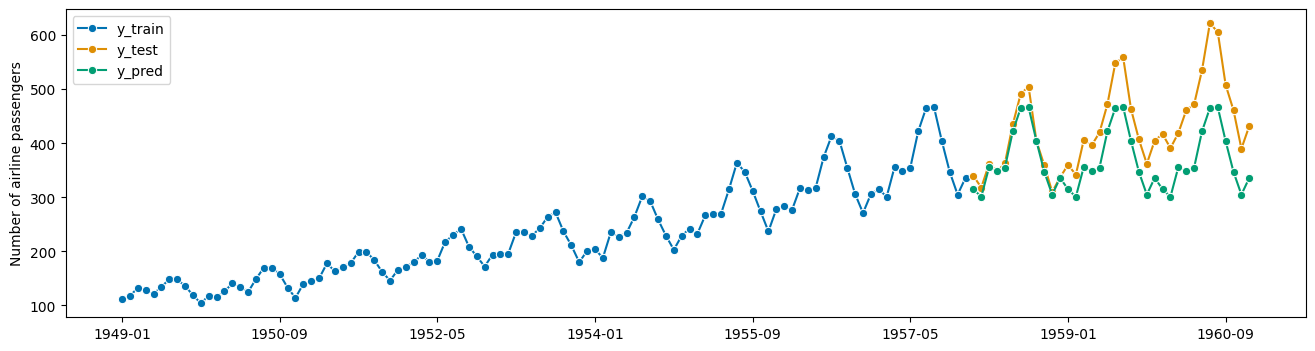

In [ ]:
plot_series(y_train, y_test, y_pred, labels=['y_train', 'y_test', 'y_pred'])

In [ ]:
mean_absolute_percentage_error(y_pred, y_test)

0.1625132136966463

### AutoArima

In [ ]:
forecaster = AutoARIMA(sp=12, suppress_warnings=True)
forecaster.fit(y_train)
y_pred = forecaster.predict(fh)
y_pred.head()

,Number of airline passengers
1958-01,345.964471
1958-02,331.731920
1958-03,386.787992
1958-04,378.774472
1958-05,385.777732


(<Figure size 1600x400 with 1 Axes>,
 <Axes: ylabel='Number of airline passengers'>)

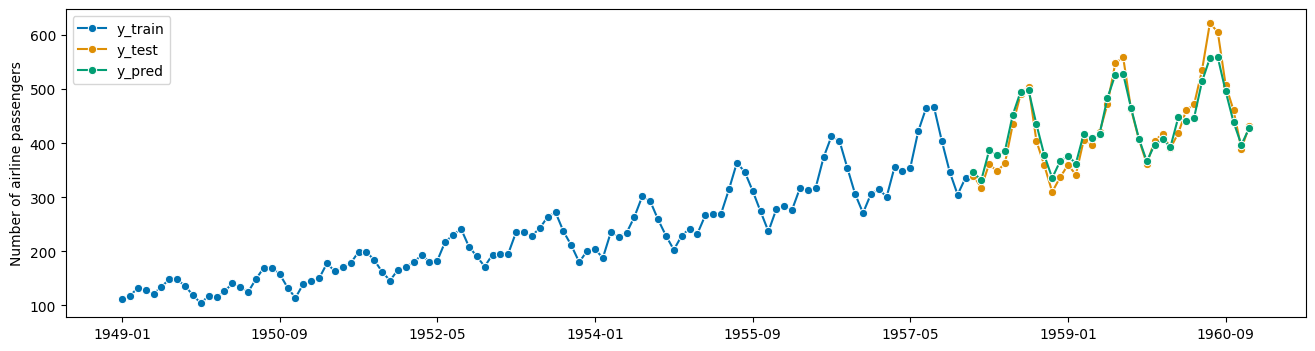

In [ ]:
plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"])

In [ ]:
mean_absolute_percentage_error(y_test, y_pred)

0.04148971434138202

### Что еще есть?

In [ ]:
all_estimators("forecaster", as_dataframe=True).head(50)

,name,object
0,ARCH,<class 'sktime.forecasting.arch._uarch.ARCH'>
1,ARDL,<class 'sktime.forecasting.ardl.ARDL'>
2,ARIMA,<class 'sktime.forecasting.arima._pmdarima.ARI...
3,AutoARIMA,<class 'sktime.forecasting.arima._pmdarima.Aut...
4,AutoETS,<class 'sktime.forecasting.ets.AutoETS'>
5,AutoEnsembleForecaster,<class 'sktime.forecasting.compose._ensemble.A...
6,AutoREG,<class 'sktime.forecasting.auto_reg.AutoREG'>
7,BATS,<class 'sktime.forecasting.bats.BATS'>
8,BaggingForecaster,<class 'sktime.forecasting.compose._bagging.Ba...
9,ColumnEnsembleForecaster,<class 'sktime.forecasting.compose._column_ens...
